In [2]:
import torch
torch.cuda.empty_cache() 

In [3]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2
import urllib.request
from PIL import Image

In [4]:
import pandas as pd
import pyproj

In [5]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [6]:
from pathlib import Path

In [7]:
import joblib

In [8]:
from mt_function_yl import *

In [9]:
import seaborn as sn

### Data loading

In [11]:
# Curb extraction data
predc_a = pd.read_csv('/home/yelhe/script/mt/output/predcurb_accident_count_sum.csv')

In [25]:
predc_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      295 non-null    int64  
 1   sum     295 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.7 KB


In [32]:
# Entropy
# iema = pd.read_csv('/home/yelhe/script/mt/output/accident_image_entropy_mean.csv')
# mewa = pd.read_csv('/home/yelhe/script/mt/output/accident_mask_entropy_wholescene_mean.csv')
# mega = pd.read_csv('/home/yelhe/script/mt/output/accident_mask_entropy_groundscene_mean.csv')

dfen_a = pd.read_csv('/home/yelhe/script/mt/output/accident_entropy_sum.csv')

In [49]:
mewa['entropy'].describe()

count    295.000000
mean       1.249353
std        0.174065
min        0.611939
25%        1.145727
50%        1.287659
75%        1.373730
max        1.620571
Name: entropy, dtype: float64

In [50]:
dfenm['mew'].describe()

count    295.000000
mean       1.242440
std        0.173847
min        0.611939
25%        1.137512
50%        1.281423
75%        1.365562
max        1.616553
Name: mew, dtype: float64

In [33]:
dfen_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170 entries, 0 to 1169
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      1170 non-null   int64  
 1   dir     1170 non-null   int64  
 2   Nr      1170 non-null   int64  
 3   mew     1170 non-null   float64
 4   meg     1170 non-null   float64
 5   ie      1170 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 55.0 KB


In [39]:
dfenm = dfen_a.groupby('id', as_index = True)[['mew','meg','ie']].mean()


In [41]:
dfenm = dfenm.reset_index()

In [51]:
dfc = pd.merge(dfenm, predc_a, on = ['id'])

In [57]:
dfc.rename(columns = {'sum':'cn'}, inplace = True)

In [61]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          295 non-null    int64  
 1   mew         295 non-null    float64
 2   meg         295 non-null    float64
 3   ie          295 non-null    float64
 4   curbnumber  295 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 11.7 KB


In [13]:
df_raw = pd.read_excel('/home/yelhe/data/Acc/E_Trottis_Unfallbericht_2019-2022.xlsx',sheet_name=None)

In [16]:
dfse = df_raw['Allgemeine Angaben']

In [20]:
se = dfse[['Unfall-Nr.', 'G*', 'SV*', 'LV*', 'Sach-\nschaden**']]

In [22]:
se.rename(columns = {'Unfall-Nr.': 'Nr', 'G*':'G', 'SV*':'SV','LV*':'LV','Sach-\nschaden**':'PD',}, inplace = True)

/sctmp/yelhe/ipykernel_3376043/902077865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  se.rename(columns = {'Unfall-Nr.': 'Nr', 'G*':'G', 'SV*':'SV','LV*':'LV','Sach-\nschaden**':'PD',}, inplace = True)


In [59]:
se.rename(columns = {'Nr':'id'}, inplace = True)

/sctmp/yelhe/ipykernel_3376043/3024162487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  se.rename(columns = {'Nr':'id'}, inplace = True)


In [60]:
se.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      350 non-null    int64
 1   G       350 non-null    int64
 2   SV      350 non-null    int64
 3   LV      350 non-null    int64
 4   PD      350 non-null    int64
dtypes: int64(5)
memory usage: 13.8 KB


In [62]:
# Regression curb
dfrc = pd.merge(se, dfc, on = ['id'])

In [69]:
dfrc.rename(columns = {'curbnumber':'cn'}, inplace = True)

In [72]:
# severity-person 
# G:10, SV:5, LV:1
dfrc['sp'] = dfrc['G']*10 + dfrc['SV'] *5 + dfrc['LV']*1

In [66]:
# severity-property, property damage
dfrc.rename(columns = {'PD':'pd'}, inplace = True)

In [74]:
dfrc['sp'].describe()

count    295.000000
mean       1.606780
std        1.635477
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        6.000000
Name: sp, dtype: float64

In [73]:
dfrc

,id,G,SV,LV,pd,mew,meg,ie,cn,sp
0,99900060852597,0,0,1,15,1.555710,1.134028,4.423497,3.0,1
1,99900063018611,0,1,0,0,1.218010,1.391244,4.394696,2.0,5
2,99900052723510,0,0,1,500,1.546895,1.165230,4.745557,3.0,1
3,99900061514043,0,0,1,3000,1.383025,1.072425,4.505332,3.0,1
4,99900063037843,0,1,0,200,1.407611,1.212947,4.718839,1.0,5
...,...,...,...,...,...,...,...,...,...,...
290,99900056387598,0,0,1,500,1.356314,1.230079,4.378835,3.0,1
291,99900055999694,0,0,2,800,1.223370,1.054068,4.720262,1.0,2
292,99900055905276,0,0,1,0,1.388393,1.234136,4.660859,1.0,1
293,99900060670975,0,0,1,200,1.281702,1.176235,4.686211,0.0,1


In [67]:
import statsmodels.api as sm

In [78]:
# result_sp = sm.OLS(formula='sp ~ mew + meg + ie + cn', data=dfrc).fit()
Y = dfrc['sp']
X = dfrc[['mew','meg','ie','cn']]
X = sm.add_constant(X)
model1 = sm.OLS(Y, X)
result1 = model1.fit()
result1.params

const    3.006348
mew     -1.378461
meg      0.464645
ie      -0.039340
cn      -0.017868
dtype: float64

In [79]:
result1.tvalues

const    1.278016
mew     -2.155572
meg      1.093304
ie      -0.078663
cn      -0.242419
dtype: float64

In [84]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sp   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.297
Date:                Thu, 07 Mar 2024   Prob (F-statistic):              0.271
Time:                        13:28:21   Log-Likelihood:                -560.59
No. Observations:                 295   AIC:                             1131.
Df Residuals:                     290   BIC:                             1150.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0063      2.352      1.278      0.202      -1.624       7.636
mew           -1.3785      0.639     -2.156      0.032      -2.637      -0.120
meg            0.4646      0.425      1.093      0.275      -0.372       1.301
ie            -0.0393      0.500     -0.079      0.937      -1.024       0.945
cn            -0.0179      0.074     -0.242      0.809      -0.163       0.127
==============================================================================
Omnibus:                       73.775   Durbin-Watson:                   1.790
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.847
Skew:                           1.520   Prob(JB):                     1.28e-27
Kurtosis:                       3.914   Cond. No.                         127.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
# result_sp = sm.OLS(formula='sp ~ mew + meg + ie + cn', data=dfrc).fit()
Y2 = dfrc['pd']
X2 = dfrc[['mew','meg','ie','cn']]
X2 = sm.add_constant(X2)
model2 = sm.OLS(Y2, X2)
result2 = model2.fit()
result2.params

const    8775.819709
mew       292.416884
meg       579.330298
ie      -1905.199714
cn       -124.232695
dtype: float64

In [86]:
result2.tvalues

const    1.775085
mew      0.217573
meg      0.648606
ie      -1.812638
cn      -0.801993
dtype: float64

In [87]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pd   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.120
Date:                Thu, 07 Mar 2024   Prob (F-statistic):              0.347
Time:                        13:31:50   Log-Likelihood:                -2817.5
No. Observations:                 295   AIC:                             5645.
Df Residuals:                     290   BIC:                             5663.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8775.8197   4943.887      1.775      0.077    -954.630    1.85e+04
mew          292.4169   1343.995      0.218      0.828   -2352.805    2937.638
meg          579.3303    893.193      0.649      0.517   -1178.633    2337.293
ie         -1905.1997   1051.064     -1.813      0.071   -3973.882     163.482
cn          -124.2327    154.905     -0.802      0.423    -429.113     180.648
==============================================================================
Omnibus:                      556.733   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           320937.334
Skew:                          11.247   Prob(JB):                         0.00
Kurtosis:                     163.013   Cond. No.                         127.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

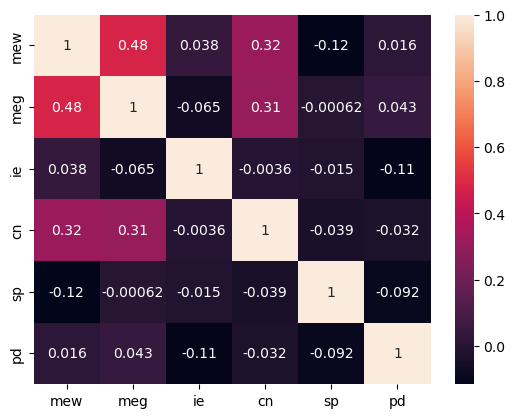

In [88]:
# vc
vc = dfrc[['mew', 'meg', 'ie', 'cn', 'sp', 'pd']]
corr_matrix = vc.corr()
sn.heatmap(corr_matrix, annot = True)
plt.show()

In [90]:
Y3 = dfrc['sp']
X3 = dfrc['mew']
X3 = sm.add_constant(X3)
model3 = sm.OLS(Y3, X3)
result3 = model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sp   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     3.981
Date:                Thu, 07 Mar 2024   Prob (F-statistic):             0.0469
Time:                        13:44:11   Log-Likelihood:                -561.22
No. Observations:                 295   AIC:                             1126.
Df Residuals:                     293   BIC:                             1134.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9600      0.685      4.322      0.000       1.612       4.308
mew           -1.0892      0.546     -1.995      0.047      -2.164      -0.015
==============================================================================
Omnibus:                       73.700   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.717
Skew:                           1.522   Prob(JB):                     1.37e-27
Kurtosis:                       3.891   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""